# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [62]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [64]:
def calc_slope(xs,ys):
    m = ((np.mean(xs) * np.mean(ys)) - np.mean(xs*ys)) / ((np.mean(xs)**2) - np.mean(xs**2))
    return m

calc_slope(X,Y)

0.5575757575757568

In [65]:
def best_fit(xs,ys):
    m = calc_slope(xs,ys)
    y_int = ys.mean() - m * xs.mean()
    return round(m, 2), round(y_int, 2)

m, c = best_fit(X,Y)
m, c

(0.56, 6.33)

In [66]:
def reg_line(m, c, xs):
    y = m*xs + c
    return y
regression_line = reg_line(m,c,X)
regression_line

array([ 6.89,  7.45,  8.01,  8.57,  9.13,  9.69, 10.25, 10.81, 11.37,
       11.93])

In [67]:
def sq_err(y_real, reg_line):
    """
    input
    y_real : true y values
    y_predicted : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    RSS = 0
    
    for i in range(len(y_real)):
        RSS += (y_real[i] - reg_line[i])**2
    
    return round(RSS, 2)

In [68]:
def r_squared(y_real, reg_line):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    y_bar = np.mean(y_real)
    SST = 0
    for i in range(len(y_real)):
        SST += (y_real[i] - y_bar)**2
        
    r2 = 1 - (sq_err(y_real, reg_line)/SST)
    
    return round(r2, 2)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


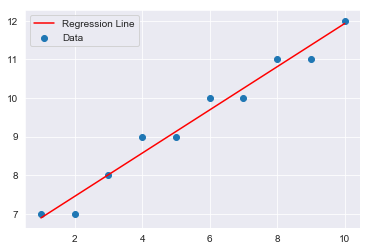

In [69]:
print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope: {}'.format(round(calc_slope(X,Y), 2)))
print('Y-Intercept: {}'.format(round(c, 2)))
print('R-Squared: {}'.format(round(r_squared(Y,regression_line), 2)))
print('----------------------------')
print('Model: Y = {} * X + {}'.format(m, c))

plt.scatter(X,Y, label='Data');
plt.plot(X,regression_line, color='red', label='Regression Line');
plt.legend();

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

R-Squared: 0.97


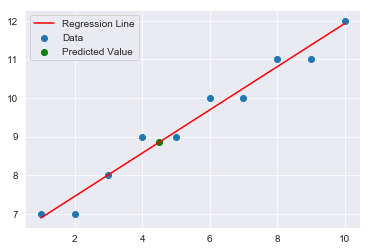

In [70]:
plt.scatter(X,Y, label='Data');
plt.plot(X,regression_line, color='red', label='Regression Line');
plt.scatter(4.5,reg_line(m,c,4.5), color='green', label='Predicted Value')
plt.legend();
print('R-Squared: {}'.format(r_squared(Y,regression_line)))

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y.

In [71]:
df = pd.read_csv('heightweight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [72]:
m, c = best_fit(df.height, df.weight)
m, c

(5.54, -204.48)

In [73]:
reg_line_2 = reg_line(m,c,df.height)
reg_line_2

0     172.24
1     188.86
2     133.46
3     177.78
4     188.86
5     116.84
6     194.40
7     199.94
8     116.84
9     205.48
10    133.46
11    122.38
12    177.78
13    172.24
14    150.08
15    177.78
16    194.40
17    161.16
18    155.62
19    177.78
Name: height, dtype: float64

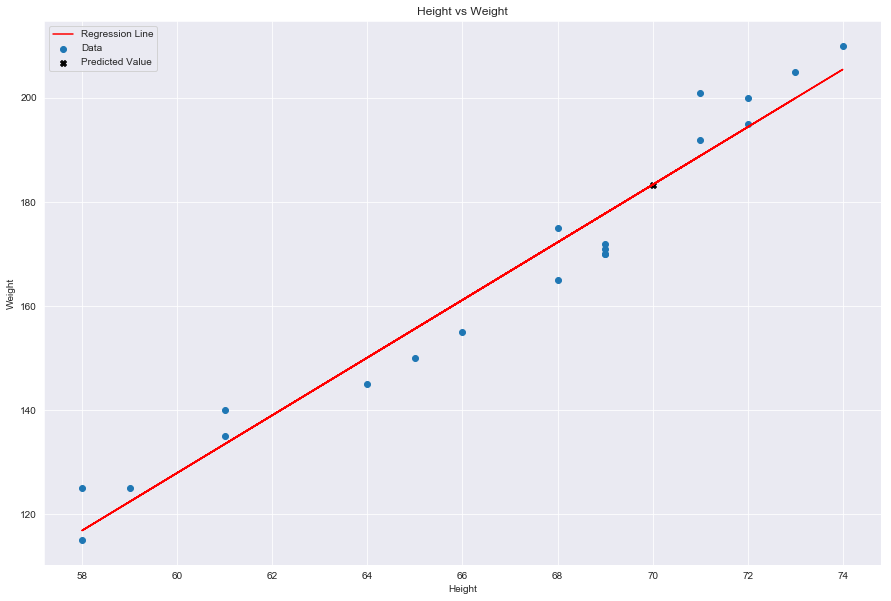

In [84]:
plt.figure(figsize=(15,10))
plt.scatter(df.height, df.weight, label='Data');
plt.plot(df.height, reg_line_2, color='red', label='Regression Line');
plt.scatter(70, reg_line(m,c,70), marker='X',color='black', label='Predicted Value');

plt.xlabel('Height');
plt.ylabel('Weight');
plt.title('Height vs Weight');
plt.legend();

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 